In [1]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import datetime as dt

mpl.rcParams['savefig.dpi'] = 100 
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 40})

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

import matplotlib.dates as mdates

In [2]:
with open("../results/trips-time-series.txt") as f:
    lines = f.readlines()

In [3]:
tuples = [line.strip() for line in lines]

In [4]:
taxi_dates = [x[1:].split(",")[0][1:-1] for x in tuples]
rides = [float(x[:-1].split(",")[1]) for x in tuples]

In [5]:
x = [dt.datetime.strptime(d, '%Y/%m').date() for d in taxi_dates]
y = range(len(x))

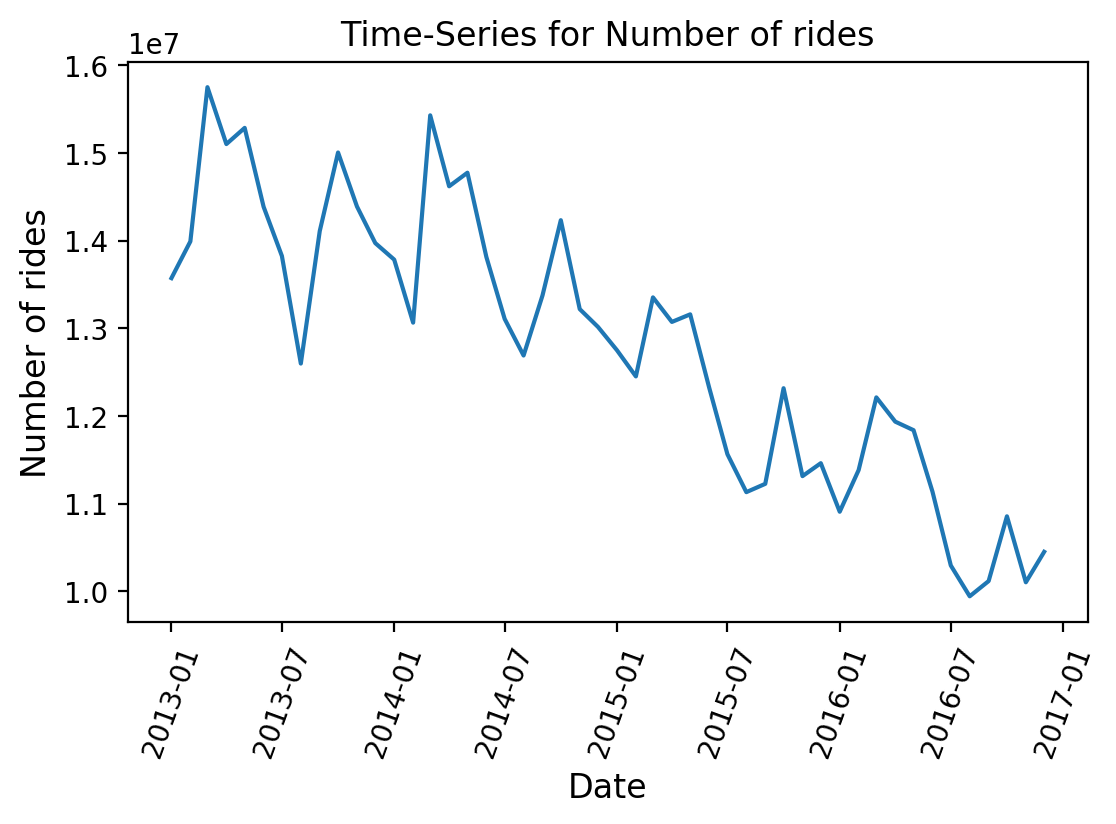

In [6]:
fig = mpl.pyplot.gcf()

ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title("Time-Series for Number of rides")

plt.plot(x, rides)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of rides", fontsize=12)

plt.savefig("time-series-rides.jpg",bbox_inches="tight")

In [21]:
with open("../results/trips-without-outliers.txt") as f:
    lines = f.readlines()

In [22]:
tuples = [line.strip() for line in lines]

In [23]:
taxi_dates = [x[1:].split(",")[0][1:-1] for x in tuples]
miles = [float(x[:-1].split(",")[1]) for x in tuples]

In [24]:
avg_miles = [a / b for a, b in zip(miles, rides)]
x = [dt.datetime.strptime(d, '%Y/%m').date() for d in taxi_dates]

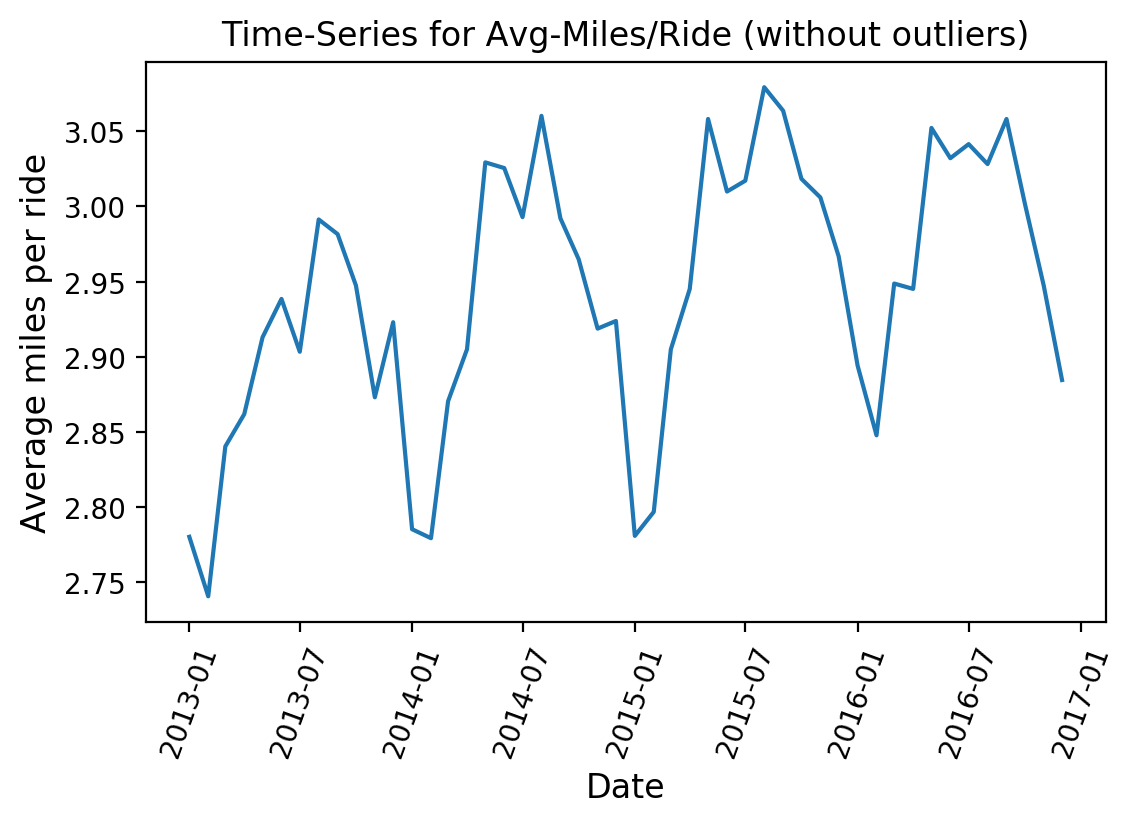

In [26]:
fig = mpl.pyplot.gcf()

ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title("Time-Series for Avg-Miles/Ride (without outliers)")

plt.plot(x, avg_miles)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel("Date", fontsize=12)
plt.ylabel("Average miles per ride", fontsize=12)

plt.savefig("time-series-avg-miles-without-outliers.jpg",bbox_inches="tight")

In [12]:
len(rides)

48

In [19]:
avg_miles

[2.781294501338886,
 2.74161222346313,
 2.8414825431443895,
 2.862899182330029,
 2.9141553664630706,
 2.9399074315058558,
 2.9047957709291317,
 77.43503586576766,
 2.9832151238335376,
 2.9489267713087,
 2.8743544214732157,
 2.924536929686005,
 2.7867881947619346,
 2.780515008239232,
 3.81348258281774,
 2.9066660357422163,
 3.0312691700259986,
 4.741762082016938,
 2.9950834956908494,
 3.06254537340069,
 2.9942308129435613,
 2.9668186248827095,
 2.9204367790631034,
 2.92548395013711,
 13.459129611562714,
 10.851913556067224,
 15.743212908646347,
 30.87326136690289,
 13.633590620098696,
 11.829075784983859,
 7.309229624909445,
 8.290585945361437,
 7.0555746805162105,
 4.364796638996302,
 26.823278984564713,
 5.294901460860691,
 4.648196988536869,
 5.060762782694008,
 6.131769762914482,
 3.957397031992917,
 6.110068658451592,
 3.044005597428781,
 3.5350813418973344,
 3.948414277513966,
 9.215423126965398,
 5.495644211969983,
 2.9833578083745795,
 2.8886313846678457]

In [20]:
for a, b in zip(taxi_dates, rides):
    print(a, b)

2013/01 13571249.0
2013/02 13990176.0
2013/03 15749228.0
2013/04 15100468.0
2013/05 15285049.0
2013/06 14385456.0
2013/07 13823840.0
2013/08 12597109.0
2013/09 14107693.0
2013/10 15004556.0
2013/11 14388451.0
2013/12 13971118.0
2014/01 13782492.0
2014/02 13063791.0
2014/03 15428127.0
2014/04 14618759.0
2014/05 14774041.0
2014/06 13813029.0
2014/07 13106365.0
2014/08 12688877.0
2014/09 13374016.0
2014/10 14232487.0
2014/11 13218216.0
2014/12 13014161.0
2015/01 12748986.0
2015/02 12450521.0
2015/03 13351609.0
2015/04 13071789.0
2015/05 13158262.0
2015/06 12324935.0
2015/07 11562783.0
2015/08 11130304.0
2015/09 11225063.0
2015/10 12315488.0
2015/11 11312676.0
2015/12 11460573.0
2016/01 10906858.0
2016/02 11382049.0
2016/03 12210952.0
2016/04 11934338.0
2016/05 11836853.0
2016/06 11135470.0
2016/07 10294080.0
2016/08 9942263.0
2016/09 10116018.0
2016/10 10854626.0
2016/11 10102128.0
2016/12 10449408.0
